INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpszhe__f_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpszhe__f_/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmpszhe__f_/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 100...
INFO:tensorflow:Loss for final step: 0.26709875.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-04T15:07:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpszhe__f_/model.ckpt-100
INFO:ten

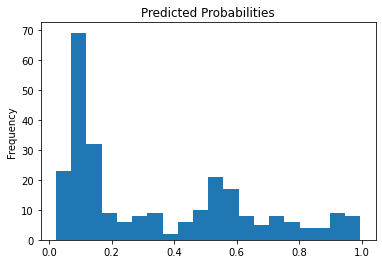

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




#Create data frames
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


#Feature columns
categorical_features = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
num_features = ['age','fare']

feature_columns = []

for feature in categorical_features:
  vocabulary = dftrain[feature].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature,vocabulary))

for feature in num_features:
  feature_columns.append(tf.feature_column.numeric_column(feature,dtype=tf.float32))


#Create models(data sets)
def make_input_func(df_train, df_eval, shuffle=True, epoch_num = 5, batch_num = 32):
  def input_func():
    ds = tf.data.Dataset.from_tensor_slices((dict(df_train),df_eval))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_num).repeat(epoch_num)
    return ds
  return input_func

train_model = make_input_func(dftrain,y_train)
eval_model = make_input_func(dfeval,y_eval,shuffle=False,epoch_num=1)


#train and get results
el = tf.estimator.LinearClassifier(feature_columns)

el.train(train_model)
result = el.evaluate(eval_model)

print(result['accuracy'])



#predict

pred_dicts = list(el.predict(eval_model))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
probs.plot(kind='hist',bins=20,title='Predicted Probabilities')
